In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [18]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("/Users/vidyanshsinha/Desktop/machine learning/magic+gamma+telescope/magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [22]:
df["class"]= (df["class"]=="g").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


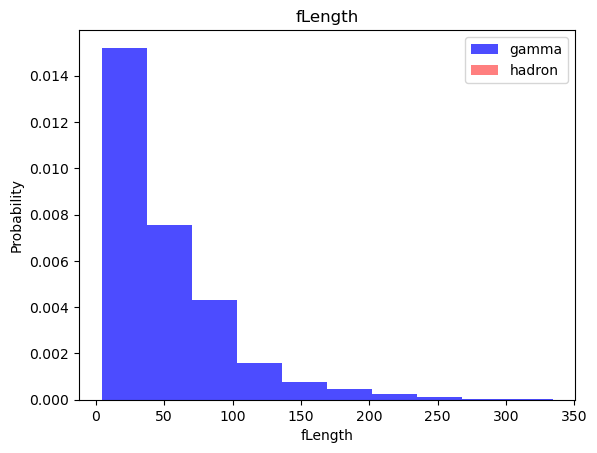

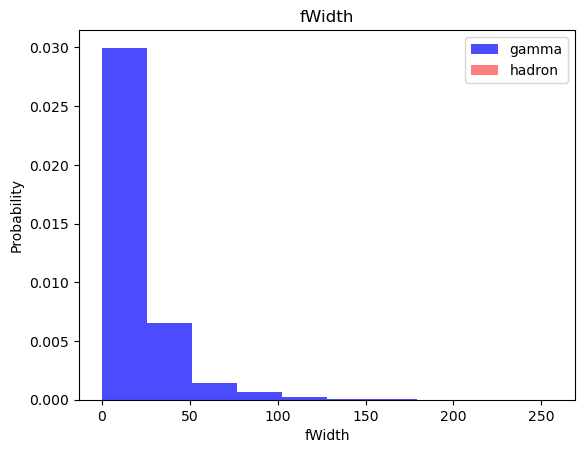

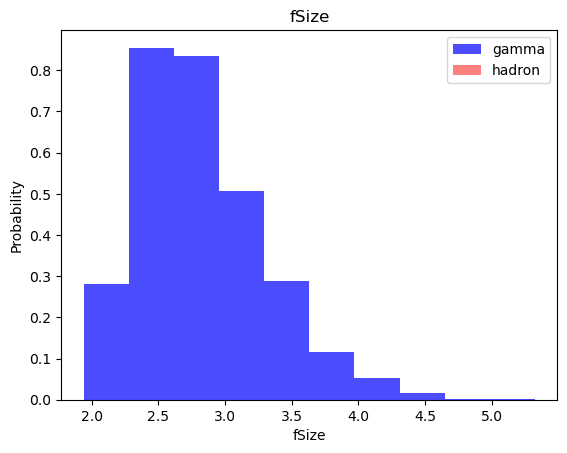

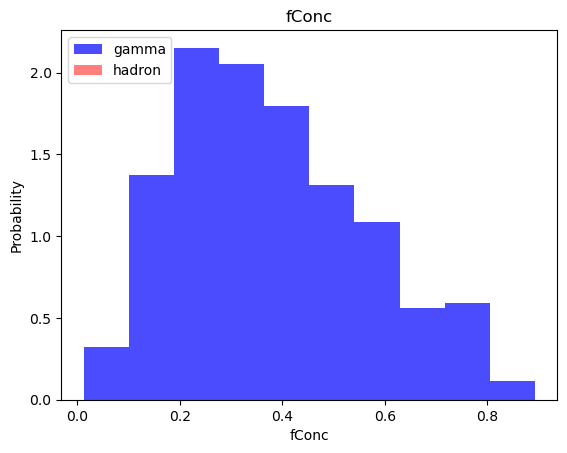

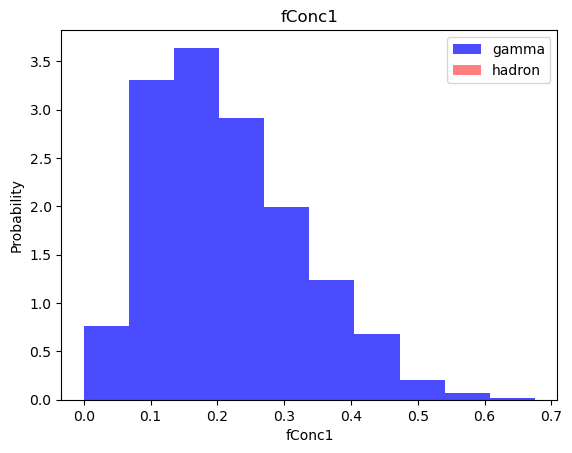

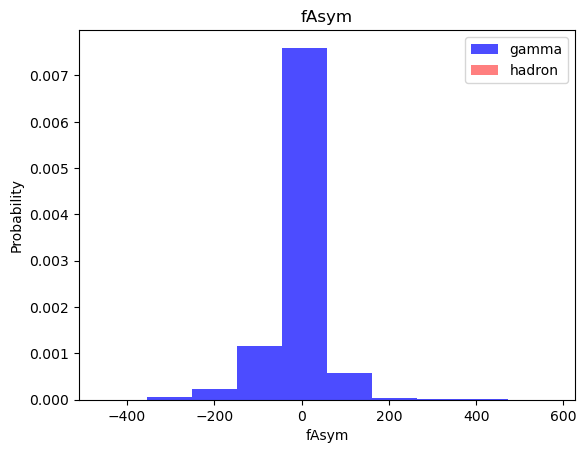

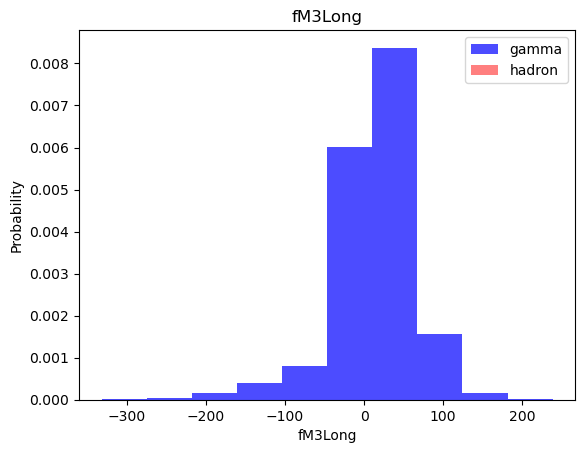

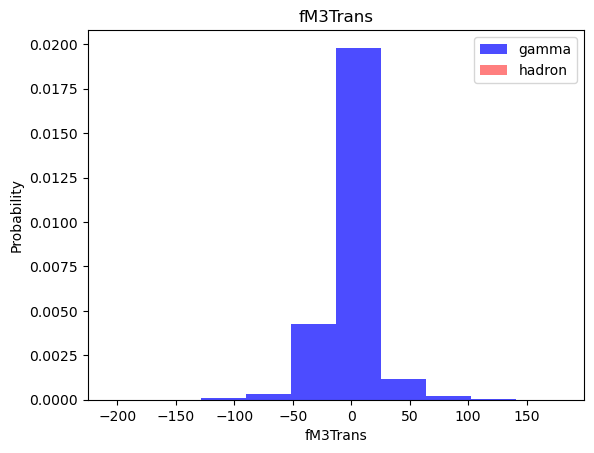

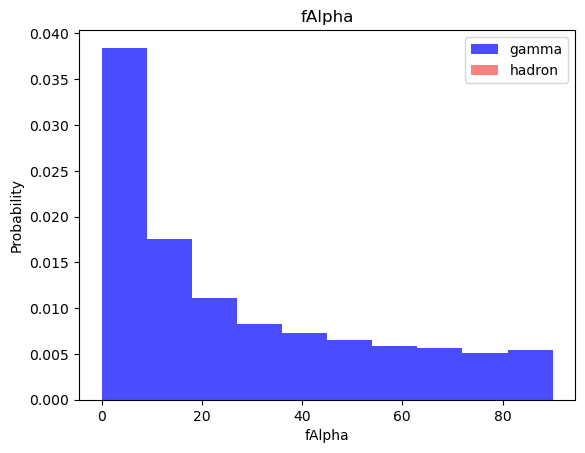

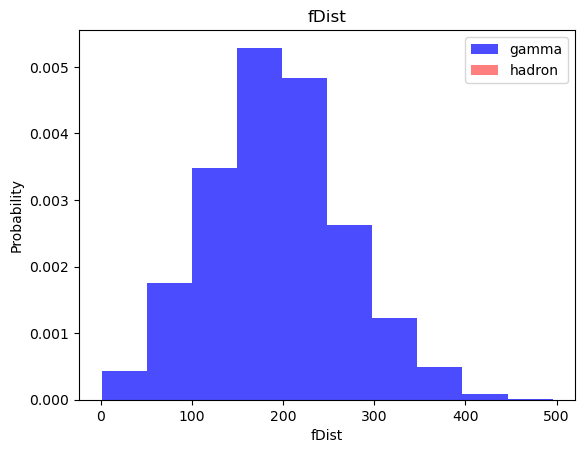

In [30]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 0][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"] == 1][label], color='red', label='hadron', alpha=0.5, density=True) 
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Probability")
    plt.legend()  
    plt.show() 

In [32]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [62]:
def scale_dataset(dataframe , oversample=False):
    cols = dataframe.columns  
    X = dataframe[cols[:-1]].values  
    y = dataframe[cols[-1]].values 
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    y = y.reshape(-1, 1)  
    
    if oversample and len(np.unique(y)) > 1:
        ros= RandomOverSampler()
        X,y=ros.fit_resample(X,y)
        
    data = np.hstack((X, y))
    
    return data, X, y

In [64]:
train,X_train,y_train=scale_dataset(train, oversample=True)
valid,X_valid,y_valid=scale_dataset(valid, oversample=False)
test,X_test,y_test=scale_dataset(test, oversample=False)